# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [1]:
#VC Added
import sys
import os

# Datastructures to help with reading and manipulating data
import numpy as np
import pandas as pd
# Set the display format for floating-point numbers
pd.set_option('display.float_format', '{:.2f}'.format)

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

##Loading the Data set

In [2]:
# loading the dataset
from google.colab import drive
drive.mount('/content/drive')
#VC Added
os.chdir("/content/drive/MyDrive")

Mounted at /content/drive


In [3]:
#Load the File
data_original = pd.read_csv("BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
#Copy the data onto another pd.
data = data_original.copy()
# let's view a sample of the data
data.sample(n=10, random_state=1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6498,712389108,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,36,6,3,2,2570.000,2107,463.000,0.651,4058,83,0.766,0.820
9013,718388733,Existing Customer,38,F,1,College,NaN,Less than $40K,Blue,32,2,3,3,2609.000,1259,1350.000,0.871,8677,96,0.627,0.483
2053,710109633,Existing Customer,39,M,2,College,Married,$60K - $80K,Blue,31,6,3,2,9871.000,1061,8810.000,0.545,1683,34,0.478,0.107
3211,717331758,Existing Customer,44,M,4,Graduate,Married,$120K +,Blue,32,6,3,4,34516.000,2517,31999.000,0.765,4228,83,0.596,0.073
5559,709460883,Attrited Customer,38,F,2,Doctorate,Married,Less than $40K,Blue,28,5,2,4,1614.000,0,1614.000,0.609,2437,46,0.438,0.000
6106,789105183,Existing Customer,54,M,3,Post-Graduate,Single,$80K - $120K,Silver,42,3,1,2,34516.000,2488,32028.000,0.552,4401,87,0.776,0.072
4150,771342183,Attrited Customer,53,F,3,Graduate,Single,$40K - $60K,Blue,40,6,3,2,1625.000,0,1625.000,0.689,2314,43,0.433,0.000
2205,708174708,Existing Customer,38,M,4,Graduate,Married,$40K - $60K,Blue,27,6,2,4,5535.000,1276,4259.000,0.636,1764,38,0.900,0.231
4145,718076733,Existing Customer,43,M,1,Graduate,Single,$60K - $80K,Silver,31,4,3,3,25824.000,1170,24654.000,0.684,3101,73,0.780,0.045
5324,821889858,Attrited Customer,50,F,1,Doctorate,Single,abc,Blue,46,6,4,3,1970.000,1477,493.000,0.662,2493,44,0.571,0.750


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- Out of the 20 columns present in the dataset, 5 of them are categorical dataset while 15 of them are numerical in nature
- There are missing values in Education_level and Marital_Status

In [6]:
data.isnull().sum()
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

,0
CLIENTNUM,0.000
Attrition_Flag,0.000
Customer_Age,0.000
Gender,0.000
Dependent_count,0.000
Education_Level,15.000
Marital_Status,7.400
Income_Category,0.000
Card_Category,0.000
Months_on_book,0.000


- Education_Level column has 15% missing values out of the total observations
- Marital_Status has 7.4% missing values out of the total observations

In [7]:
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


In [8]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


##Data Observations
- ClientNum is used to uniquely identify each record in the dataset. It is not beneficial to us, and therefore can be dropped
- On an average we have a senior customers above 40 as our customer base with 2 dependents. This implies that our customers with family and person >40 years of age.
- 75% of the customer base is over 52 years. A old set of customers the bank has.
- On an average the credit limit is \$8600(currency is being guessed), while the Transaction amount average is about \$4400

List all categorical variables

In [10]:
# list of all categorical variables
cat_col = data.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

CLIENTNUM
768805383   0.000
711784908   0.000
720133908   0.000
803197833   0.000
812222208   0.000
             ... 
796903083   0.000
716014983   0.000
712521783   0.000
780045708   0.000
714337233   0.000
Name: proportion, Length: 10127, dtype: float64
--------------------------------------------------
Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64
--------------------------------------------------
Customer_Age
44   0.049
49   0.049
46   0.048
45   0.048
47   0.047
43   0.047
48   0.047
50   0.045
42   0.042
51   0.039
53   0.038
41   0.037
52   0.037
40   0.036
39   0.033
54   0.030
38   0.030
55   0.028
56   0.026
37   0.026
57   0.022
36   0.022
35   0.018
59   0.016
58   0.016
34   0.014
33   0.013
60   0.013
32   0.010
65   0.010
61   0.009
62   0.009
31   0.009
26   0.008
30   0.007
63   0.006
29   0.006
64   0.004
27   0.003
28   0.003
67   0.000
66   0.000
68   0.000
70   0.000
73   0.000
Name: proportion, dtype: float64
-

- 53% of the creditcard users are men while 47% is women. Seems like a reasonable distribution
- As said earlier, lets drop the client id since it does not add value.

In [11]:
# enrollee_id is unique for each candidate and might not add value to modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### EDA Functions Defined

 The below functions need to be defined to carry out the Exploratory Data Analysis.

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [15]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

##Q1- How is the total transaction amount distributed?

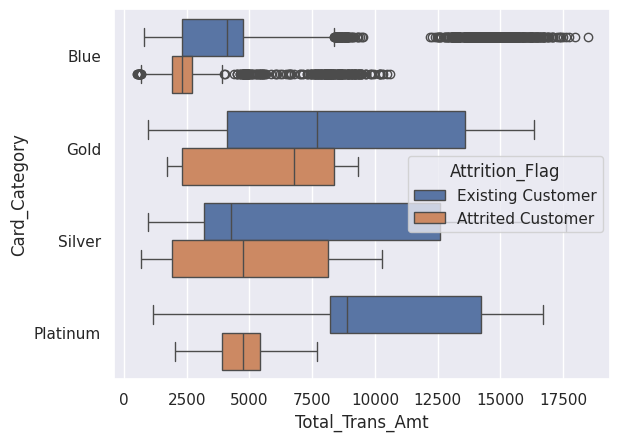

In [17]:
sns.boxplot(data=data, y='Card_Category', x='Total_Trans_Amt', hue='Attrition_Flag');

- The total transaction amount spent by the existing customer is more than the transaction amount spent by an Attrited customer. This is a strong indicator that we are losing this specific customer base

- The IQR also has a very narrow range for an attrited customer as compared to an existing customer

- So, If under a specific card category segment, there is a sustained downtrend seen, it could be an indicator of attrition, under that segment.

 - As you observe the the attrited customer exists across all the income categories and across all card category as well.
 - However in 'Gold' and 'Silver' category, the attrited customer seems overshoot the the 'existing customer' income category, where as the reverse holds good in Platinum Category.
 - However, the question is - Why are Platinum Cards being distributed for a lower income category? We will park this question for now.

##Q2: What is the distribution of the level of education of customers?


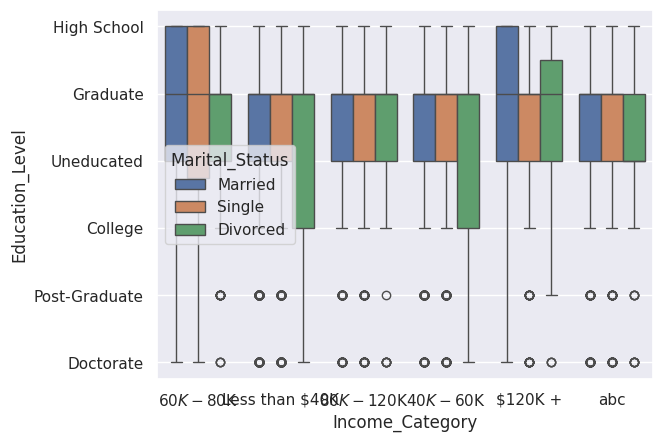

In [18]:
sns.boxplot(data=data_original, y='Education_Level', x='Income_Category', hue='Marital_Status');

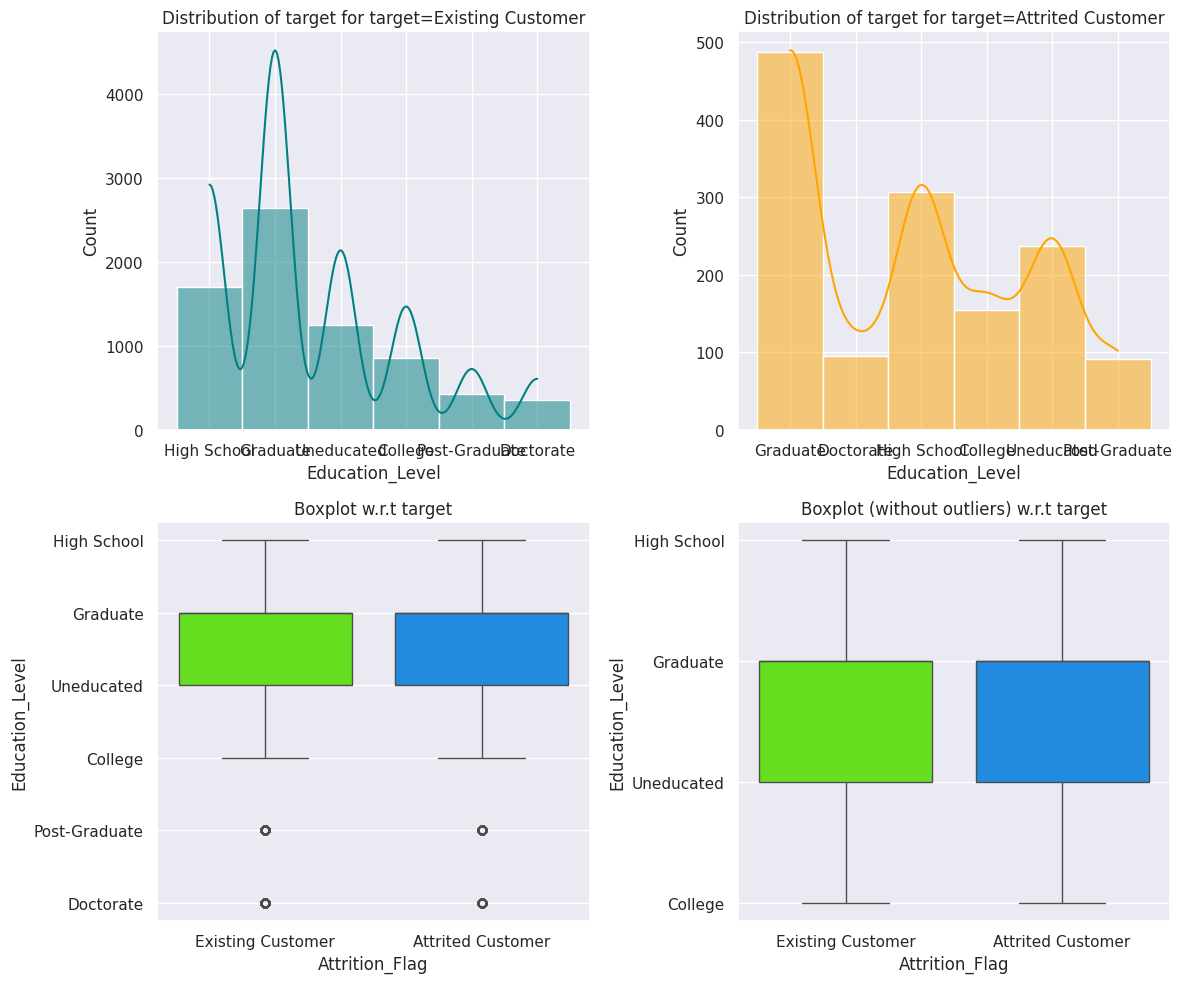

In [19]:
distribution_plot_wrt_target(data_original, "Education_Level","Attrition_Flag")

- When you look at the educationn level distribution from an income standpoint of view, we see that there are highschool passed out in the income range of 60k-80k and contrastingly 120k!
- Majority of the customers we see are Graduates, with College degree spread between as well
- When you inspect the Education level spread across Attrition levels, we see that Graduates seem to top the attrition, followed by highschool



##Q3: What is the distribution of the level of income of customers?

Refer from Q2 above where we have charted income levels against the education levels.
Lets go one step further to investigate few other relations w.r.t income levels

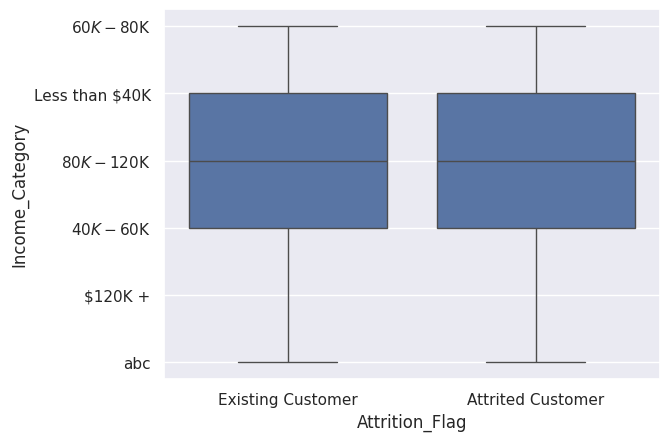

In [20]:
#distribution_plot_wrt_target(data, "Education_Level", "Attrition_Flag")
sns.boxplot(data=data, y='Income_Category', x='Attrition_Flag');

 - Cant make any quantified inferences from the above since the Users churn is distributed across all income categories and across all the credit limits

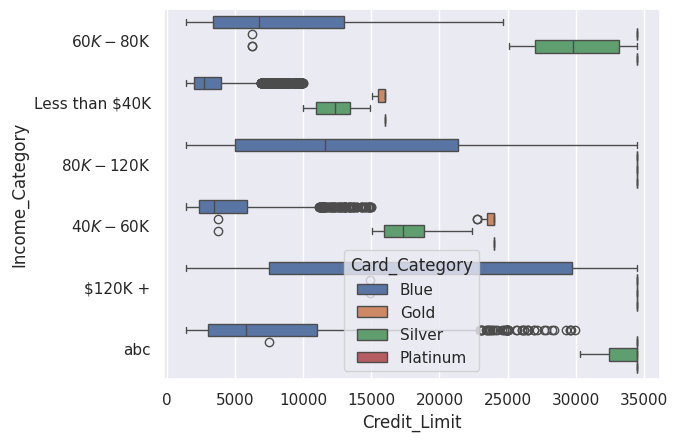

In [21]:
sns.boxplot(data=data, y='Income_Category', x='Credit_Limit', hue='Card_Category');

- Blue Cards are distributed the maximum to all the income categories
- Silver Cards are distributed maximum for customers with less than 40k income, while there is some amount of distribution for 60k-80k income category customers as well.
- The distribution of Gold card seems to be the lease across all the categories.
- An important aspect from the above graph being - Platinum cards are being distributed to the income category less than 40k, and we do see attrition there. Recommendation is to downgrade these platinum card customers to Gold or Silver card and retain the customers

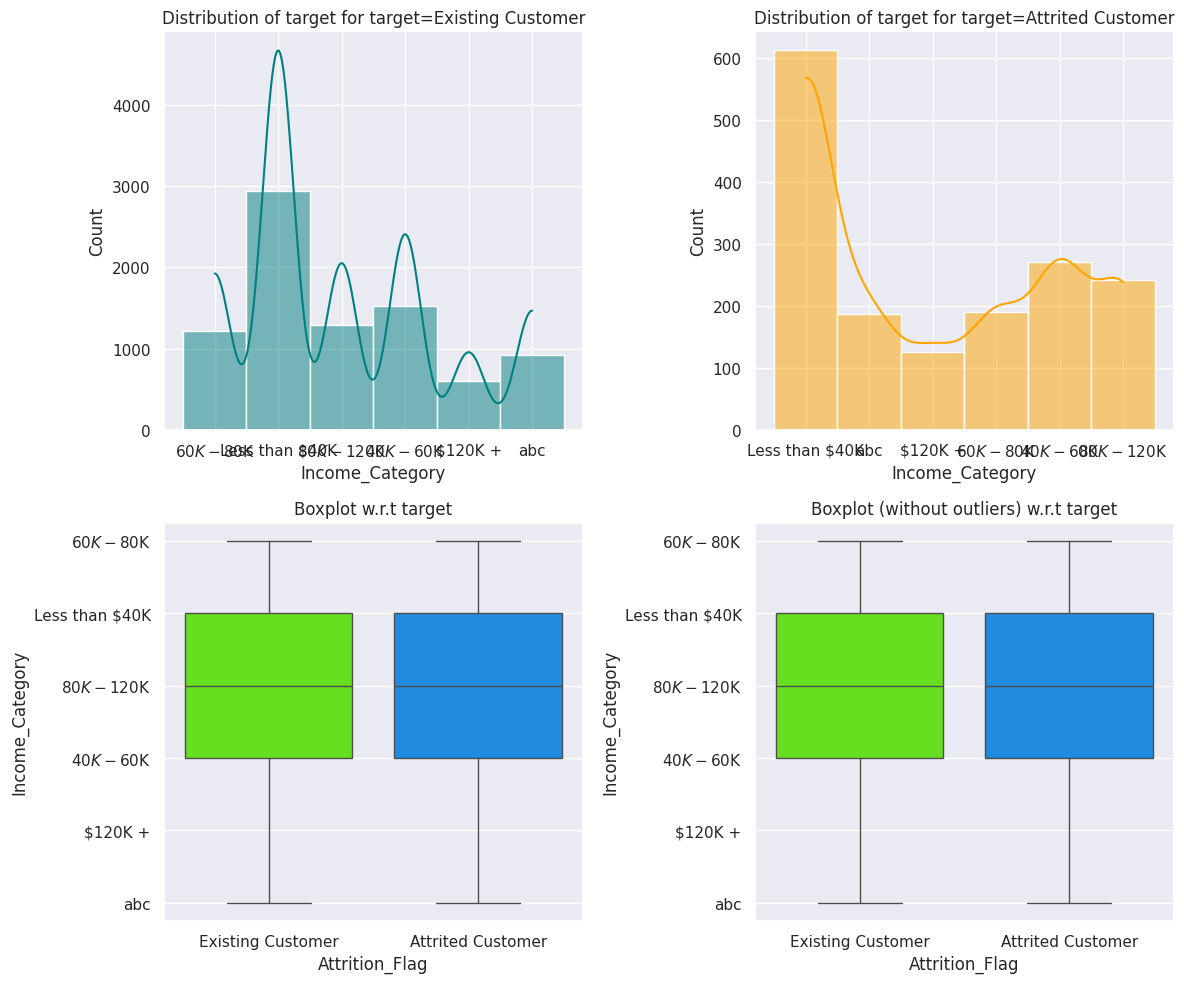

In [22]:
#histogram_boxplot
distribution_plot_wrt_target(data_original, "Income_Category", "Attrition_Flag")

- Out of the attrited customers, customers having less than 40k are the highest.

##Q4 - How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

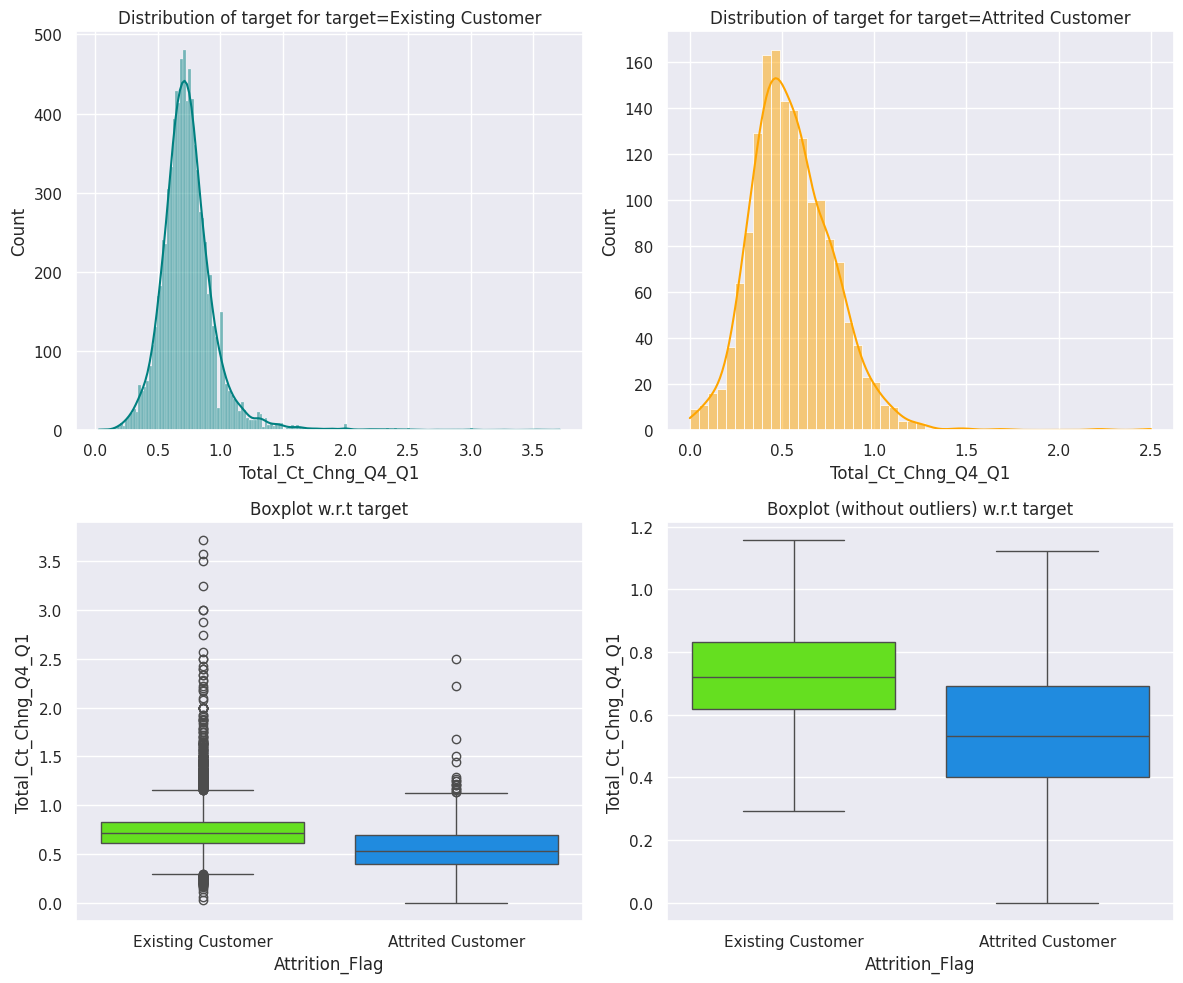

In [23]:
distribution_plot_wrt_target(data_original, "Total_Ct_Chng_Q4_Q1","Attrition_Flag")

- The range of transaction amount between Q4 and Q1, is smaller in attrited customers as compared to existing customer and and mean is around 0.5.
- We will park this for now, to see if this can be a meaningful informationn for us later

##Q5: How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)

In [24]:
# Group the data by 'Attrition_Flag' and calculate statistics for 'Months_Inactive_12_mon'
inactivity_summary = data_original.groupby('Attrition_Flag')['Months_Inactive_12_mon'].describe()
# Display summary statistics
print(inactivity_summary)

                     count  mean   std   min   25%   50%   75%   max
Attrition_Flag                                                      
Attrited Customer 1627.000 2.693 0.900 0.000 2.000 3.000 3.000 6.000
Existing Customer 8500.000 2.274 1.017 0.000 1.000 2.000 3.000 6.000


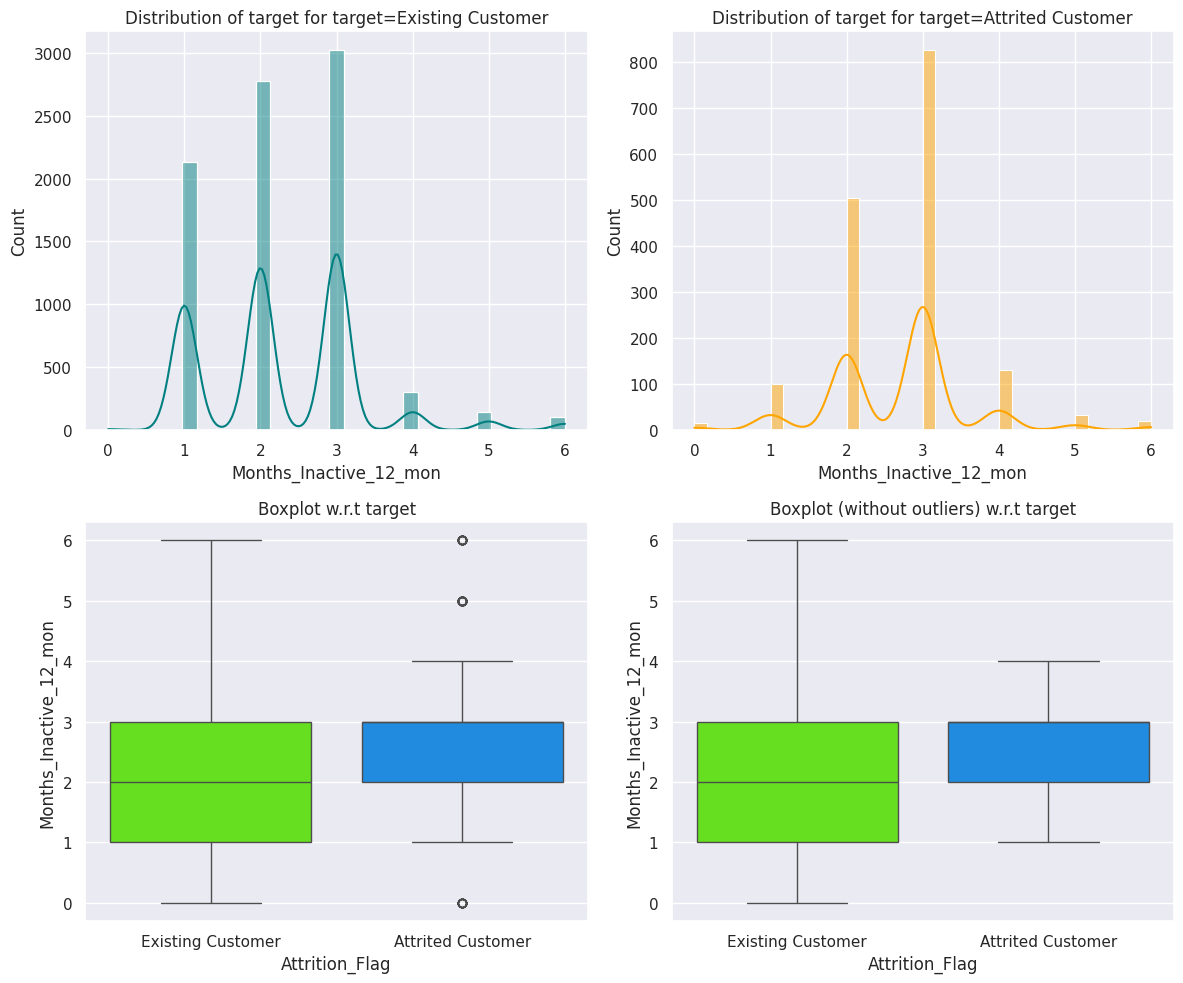

In [25]:
distribution_plot_wrt_target(data_original, "Months_Inactive_12_mon","Attrition_Flag")

- Looking at the distribution graph, we see that two to three months of inactivity is a strong indicator of attrition. However there is equal chance that the customer may stick on as well, as you see from the box plot.
- A one month of inactivity can be ignored owing to various travels or any other schedule variation. However if the inactivity increases to 2 or 3 months, then there is a >50% chance that the customer might leave.
- Being more accurate, if the customer is inactive for more than 2.7 months, it is a strong indication that he /she might leave.
- So the range of 2.27 - 2.69 months is crucial interval of time, when any discounts, or offers needs to be made to retain a customer or let him/her go.
- This is an important aspect of the churn

# Data Pre-processing

## Missing value imputation




In [27]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [28]:
# List all unique values in the 'Education_Level' column
unique_education_levels = data['Education_Level'].unique()
# Print the unique values
print(unique_education_levels)

['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']


In [29]:
#Lets handle the missing values that were present for Education_Level 	15.000 & Marital_Status 	7.400
#Lets use a 'Most Frequent' simputer strategy to replace these
# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data[['Education_Level', 'Marital_Status']] = cat_imputer.fit_transform(data[['Education_Level', 'Marital_Status']])
# Check the transformed column
unique_education_levels = data['Education_Level'].unique()
# Print the unique values
print(unique_education_levels)

['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']


In [30]:
unique_education_levels = data['Marital_Status'].unique()
# Print the unique values
print(unique_education_levels)

['Married' 'Single' 'Divorced']


In [31]:
marital_status = { 'Married' : 0, 'Single' : 1, 'Divorced': 2}
data['Marital_Status'] = data['Marital_Status'].map(marital_status)
print(data['Marital_Status'])

0        0
1        1
2        0
3        0
4        0
        ..
10122    1
10123    2
10124    0
10125    0
10126    0
Name: Marital_Status, Length: 10127, dtype: int64


In [32]:
# Define the ordinal categories for Education_Level
education_order = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5,
    'Unknown': -1  # Assigning -1 for 'Unknown' if applicable
}
# Clean and standardize the 'Education_Level' values
data['Education_Level'] = data['Education_Level'].str.strip()

# Apply label encoding to 'Education_Level'
data['Education_Level'] = data['Education_Level'].map(education_order)
print(data['Education_Level'])

0        1
1        3
2        3
3        1
4        0
        ..
10122    3
10123    3
10124    1
10125    3
10126    3
Name: Education_Level, Length: 10127, dtype: int64


In [33]:
# Convert Attrition_Flag to binary (1 for 'Attrited Customer', 0 for 'Existing Customer')
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
# Check the transformed column
print(data['Attrition_Flag'].value_counts())

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64


In [34]:
# Convert Gender to binary (1 for 'Male', 0 for 'Female')
data['Gender'] = data['Gender'].map({'M':1, 'F': 0})
# Check the transformed column
print(data['Gender'].value_counts())

Gender
0    5358
1    4769
Name: count, dtype: int64


In [35]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,0,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,1,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,0,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,0,4,1,0,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,1,3,0,0,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [36]:
#Let us see the range of the income categories
data['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
abc,1112
$120K +,727


We see from the above that there is an invalid income category - 'abc' with 1112 occurances. We can replace this with the most frequent available income category. let us replace this with the 'mode'.

In [37]:
# Find the most frequent category
most_frequent = data['Income_Category'].value_counts().idxmax()

# Replace 'abc' with the most frequent category
data['Income_Category'].replace('abc', most_frequent, inplace=True)

In [38]:
#Let us see the range of the income categories
data['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,4673
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
$120K +,727


In [39]:
# List of numerical columns to standardize
numerical_cols = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Total_Trans_Amt']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Check the transformation
data[numerical_cols].head()

,Credit_Limit,Avg_Open_To_Buy,Total_Revolving_Bal,Total_Trans_Amt
0,0.447,0.489,-0.473,-0.960
1,-0.041,-0.008,-0.367,-0.916
2,-0.574,-0.446,-1.427,-0.741
3,-0.585,-0.734,1.662,-0.952
4,-0.431,-0.303,-1.427,-1.056


In [40]:
# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Apply MinMaxScaler to numerical columns
data[numerical_cols] = minmax_scaler.fit_transform(data[numerical_cols])

# Check the transformation
data[numerical_cols].head()

,Credit_Limit,Avg_Open_To_Buy,Total_Revolving_Bal,Total_Trans_Amt
0,0.340,0.345,0.309,0.035
1,0.206,0.214,0.343,0.043
2,0.060,0.099,0.000,0.077
3,0.057,0.023,1.000,0.037
4,0.099,0.137,0.000,0.017


In [41]:
# Correlation matrix for numerical features
# Select only the numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numerical_cols].corr()

# Extract correlations with the target variable
target_corr = corr_matrix['Attrition_Flag'].sort_values(ascending=False)

# Display top correlations with the target
target_corr

,Attrition_Flag
Attrition_Flag,1.000
Contacts_Count_12_mon,0.204
Months_Inactive_12_mon,0.152
Education_Level,0.021
Dependent_count,0.019
Customer_Age,0.018
Marital_Status,0.015
Months_on_book,0.014
Avg_Open_To_Buy,-0.000
Credit_Limit,-0.024


Looking at the above correlation values, a Non-linear model is the need of the hour.

In [42]:
# List of categorical columns to one-hot encode
categorical_cols = ['Gender', 'Income_Category', 'Card_Category', 'Marital_Status']

# Apply one-hot encoding to the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded data
data_encoded.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_1,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Marital_Status_1,Marital_Status_2
0,0,45,3,1,39,5,1,3,0.340,0.309,0.345,1.335,0.035,42,1.625,0.061,True,False,True,False,False,False,False,False,False,False
1,0,49,5,3,44,6,1,2,0.206,0.343,0.214,1.541,0.043,33,3.714,0.105,False,False,False,False,True,False,False,False,True,False
2,0,51,3,3,36,4,1,0,0.060,0.000,0.099,2.594,0.077,20,2.333,0.000,True,False,False,True,False,False,False,False,False,False
3,0,40,4,1,34,3,4,1,0.057,1.000,0.023,1.405,0.037,20,2.333,0.760,False,False,False,False,True,False,False,False,False,False
4,0,40,3,0,21,5,1,0,0.099,0.000,0.137,2.175,0.017,28,2.500,0.000,True,False,True,False,False,False,False,False,False,False


##Q6 - What are the attributes that have a strong correlation with each other?

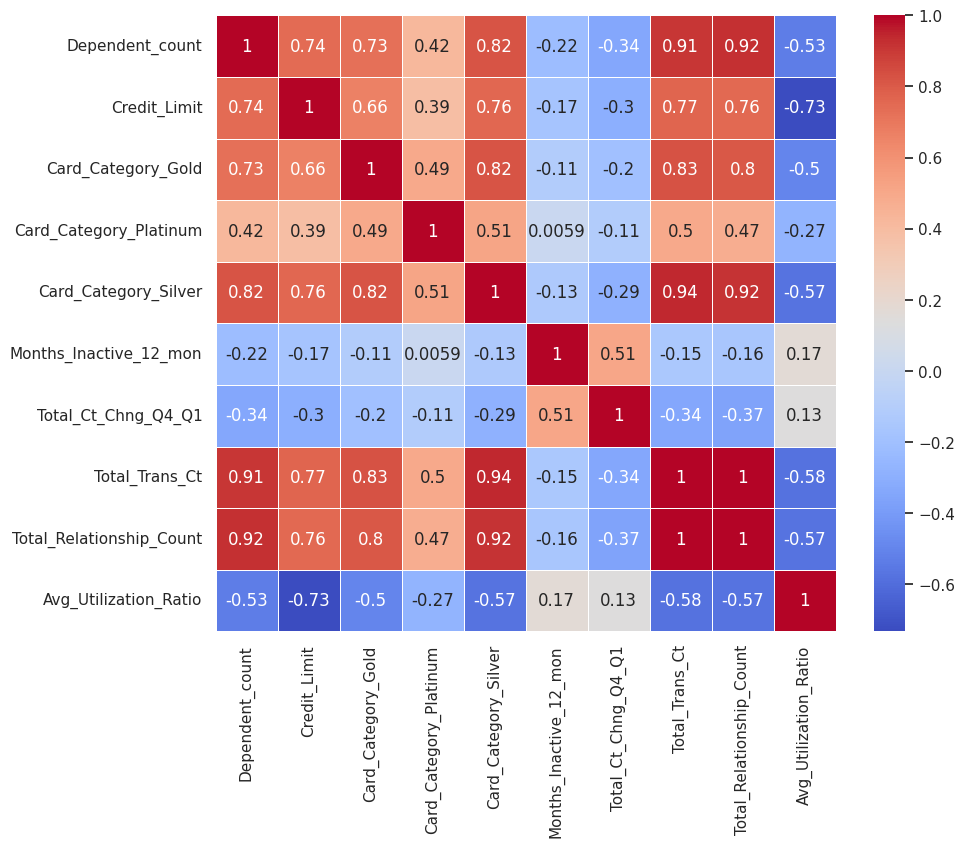

In [43]:
plt.figure(figsize=(10,8))
#credit_card_aggregation = data_encoded.groupby('Attrition_Flag').agg({'Customer_Age': 'mean', 'Dependent_count':'mean', 'Credit_Limit':'mean', 'Card_Category_Gold':'sum','Card_Category_Platinum':'sum', 'Card_Category_Silver':'sum', 'Months_Inactive_12_mon': 'mean', 'Total_Ct_Chng_Q4_Q1': 'mean', 'Months_Inactive_12_mon': 'mean'}).reset_index()
#credit_card_aggregation = credit_card_aggregation.corr()

# Aggregating the numerical columns, excluding categorical ones like Attrition_Flag
credit_card_aggregation = data_encoded.groupby('Customer_Age').agg({
    'Dependent_count':'mean',
    'Credit_Limit':'mean',
    'Card_Category_Gold':'sum',
    'Card_Category_Platinum':'sum',
    'Card_Category_Silver':'sum',
    'Months_Inactive_12_mon': 'mean',
    'Total_Ct_Chng_Q4_Q1': 'mean',
    'Total_Trans_Ct': 'sum',
    'Total_Relationship_Count' : 'sum',
    'Avg_Utilization_Ratio' : 'mean'
}).reset_index()

# Dropping non-numeric column (Attrition_Flag) for correlation calculation
credit_card_numeric = credit_card_aggregation.drop(columns=['Customer_Age'])

# Calculate correlation matrix on numeric data only
credit_card_correlation = credit_card_numeric.corr()

sns.heatmap(credit_card_correlation,annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

- The customer age has few strong relationships like 'Card Category', Total_Transaction_Count, Total_Relationships_Count along with others
- The Total_Trans_Ct has strong relationship with Dependednt_count, implying that as the dependent count increases, the total transaction count increases
-Customers with Card Category - Silver and Gold have high correlation with Total transaction counts. This aligns with our previous observation in EDA that that credict card customers with Gold and Silver category have the highest attrition rate.
- If the customer is inactive for more than 12 months, the correlation to the transaction count change to Q4-Q1 is high at .51.
- The Total_Trans_Ct also has reasonably -negative correlation with Avg Utilization Ratio at -.58
- The credit limit has a surprising negative correlationn with the Avg Utilization Ratio at -.73. The bank might need to revise its policy of credit limit.

##Data Preparation for Modeling

In [44]:
X = data_encoded.drop(["Attrition_Flag"], axis=1)
y = data_encoded["Attrition_Flag"]

In [45]:
#When I want to re-run the program, I would like X_train and y_train to take data from afresh
#Hence initializing these to None, each time.
X_train = None
y_train = None

# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)
# then we split the temporary set into train and validation
#We arrived at the test size of 0.333 to ensure that the validation set and the Test set are of the same size
#X_train, X_val, y_train, y_val = train_test_split(
#    X_temp, y_temp, test_size=0.3333, random_state=1, stratify=y_temp
#)
#print(X_train.shape, X_val.shape, X_test.shape)

(7088, 25) (3039, 25)


In [46]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 7088
Number of rows in test data = 3039


###Data Set generation

Store oversampled Data Set and Undersampled Data Set to be used across various ML models

In [47]:
##########################Using SMOTE to generate oversampled data##########################
X_train_oversampled = None
y_train_oversampled = None

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
##########################Using SMOTE to generate oversampled data##########################

In [48]:
##########################Using RandomUndersampler to generate undersampled data##########################
#initializing to None, in case of frequent runs, so that we start afresh
X_train_undersampled = None
y_train_undersampled = None
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)

X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

##########################Using RandomUndersampler to generate undersampled data##########################

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

###Function definitions for Model Classification & confusion matrix

In [50]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [51]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#Model Building with Original Data

In [52]:
models = []  # Empty list to store all the models

# Appending models into the list
#models.append(("Bagging", BaggingClassifier(random_state=1)))
#models.append(("Random forest", RandomForestClassifier(random_state=1)))
#'_______' ## Complete the code to append remaining 3 models in the list models
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGboost", XGBClassifier(random_state=1, eval_metric='logloss')))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))

# Initialize dictionaries to store training, validation scores
training_scores_originalData = {}
validation_scores_originalData = {}
print("\n" "Training Performance: Original Data")
for name, model in models:
    model.fit(X_train, y_train)
    #The suggested code by PGP tutors, has only recall_score. Lets replace this by the defined functions
    #train_recall = recall_score(y_train, model.predict(X_train))
    model_train_perf_OriginalData = model_performance_classification_sklearn(model, X_train, y_train)
    training_scores_originalData[name] = model_train_perf_OriginalData  # Store training recall score
    print("{}: {}".format(name, model_train_perf_OriginalData))
print("\n" "Validation Performance: Original Data")

for name, model in models:
    model.fit(X_train, y_train)
    #val_recall = recall_score(y_val, model.predict(X_val))
    model_test_perf_OriginalData = model_performance_classification_sklearn(model, X_test, y_test)
    validation_scores_originalData[name] = model_test_perf_OriginalData  # Store validation recall score
    print("{}: {}".format(name, model_test_perf_OriginalData))


Training Performance: Original Data
Bagging:    Accuracy  Recall  Precision    F1
0     0.997   0.983      0.996 0.989
Random forest:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
GBM:    Accuracy  Recall  Precision    F1
0     0.975   0.885      0.957 0.920
Adaboost:    Accuracy  Recall  Precision    F1
0     0.957   0.841      0.886 0.863
XGboost:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Decision Tree:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation Performance: Original Data
Bagging:    Accuracy  Recall  Precision    F1
0     0.962   0.852      0.906 0.879
Random forest:    Accuracy  Recall  Precision    F1
0     0.959   0.820      0.917 0.866
GBM:    Accuracy  Recall  Precision    F1
0     0.966   0.863      0.919 0.890
Adaboost:    Accuracy  Recall  Precision    F1
0     0.957   0.848      0.877 0.863
XGboost:    Accuracy  Recall  Precision    F1
0     0.972   0.908      0.917 0.912

#Model Hyper parameter Tuning: OverSampled Data

In [56]:
############################START : DECISION TREE: OVERSAMPLED##################
dtree_estimator_ov = DecisionTreeClassifier(random_state=1)

#########################################
#The hyper tuning parameters have been recommended by the PGP Program tutors.
# Grid of parameters to choose from
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
#########################################

#Calling RandomizedSearchCV, as suggested by the PGP Program here.
#GridSearchCV would take longer time.
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = RandomizedSearchCV(estimator=dtree_estimator_ov, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV
grid_obj = grid_obj.fit(X_train_oversampled, y_train_oversampled)

# Set the clf to the best combination of parameters
dtree_estimator_ov = grid_obj.best_estimator_
############################END : DECISION TREE: OVERSAMPLED####################

#########################START Bagging Classifier: OVERSAMPLED##################
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

#The hyper tuning parameters have been recommended by the PGP Program tutors.
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = GridSearchCV(bagging_estimator_tuned, param_grid, scoring=scorer,cv=5)
#grid_obj = grid_obj.fit(X_train, y_train)

#Calling RandomizedSearchCV, as suggested by the PGP Program here.
#GridSearchCV would take longer time.
grid_obj = RandomizedSearchCV(estimator=bagging_estimator_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV
grid_obj = grid_obj.fit(X_train_oversampled, y_train_oversampled)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

#########################END : Bagging Classifier: OVERSAMPLED#################

########################START : RandomForest: OVERSAMPLED#######################
# Choose the type of classifier.
random_Forest = RandomForestClassifier(random_state=1)
#The hyper tuning parameters have been recommended by the PGP Program tutors.
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = GridSearchCV(random_Forest, param_grid, scoring=scorer, cv=5,n_jobs=-1)
#grid_obj = grid_obj.fit(X_train, y_train)

grid_obj = RandomizedSearchCV(estimator=random_Forest, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV
grid_obj = grid_obj.fit(X_train_oversampled, y_train_oversampled)

# Set the clf to the best combination of parameters
random_Forest = grid_obj.best_estimator_
########################END : RandomForest: OVERSAMPLED#########################

########################START : Boosting:AdaBoost: OVERSAMPLED##################
# Choose the type of classifier.
adaBoost_tuned = AdaBoostClassifier(random_state=1)
#The hyper tuning parameters have been recommended by the PGP Program tutors.
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    }
# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = RandomizedSearchCV(estimator=adaBoost_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV
grid_obj = grid_obj.fit(X_train_oversampled, y_train_oversampled)


# Set the clf to the best combination of parameters
adaBoost_tuned = grid_obj.best_estimator_
#######################END :Boosting:AdaBoost: OVERSAMPLED####################

########################START :Boosting:Gradient Boost: VERSAMPLED##############
# Choose the type of classifier.
gradient_Boost_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
#The hyper tuning parameters have been recommended by the PGP Program tutors.
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
# Run the grid search
#grid_obj = GridSearchCV(gradient_Boost_tuned, param_grid, scoring=scorer,cv=5)
#grid_obj = grid_obj.fit(X_train, y_train)

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = RandomizedSearchCV(estimator=gradient_Boost_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
grid_obj = grid_obj.fit(X_train_oversampled, y_train_oversampled)
#X_train_oversampled, y_train_oversampled
# Set the clf to the best combination of parameters
gradient_Boost_tuned = grid_obj.best_estimator_
#######################END :Boosting:Gradient Boost: OVERSAMPLED#################
# Choose the type of classifier.
XGBoost_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

#The hyper tuning parameters have been recommended by the PGP Program tutors.
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = GridSearchCV(XGBoost_tuned, param_grid,scoring=scorer,cv=5)
#grid_obj = grid_obj.fit(X_train, y_train)

grid_obj = RandomizedSearchCV(estimator=XGBoost_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV
grid_obj = grid_obj.fit(X_train_oversampled, y_train_oversampled)

# Set the clf to the best combination of parameters
XGBoost_tuned = grid_obj.best_estimator_

############################END : Boosting:XG Boost: OVERSAMPLED################
##################################################################################

models = []  # Empty list to store all the models

# Appending models into the list
#models.append(("Bagging", BaggingClassifier(random_state=1)))
#models.append(("Random forest", RandomForestClassifier(random_state=1)))
#'_______' ## Complete the code to append remaining 3 models in the list models
models.append(("Bagging", bagging_estimator_tuned))
models.append(("Random forest", random_Forest))
models.append(("GBM", gradient_Boost_tuned))
models.append(("Adaboost", adaBoost_tuned))
models.append(("XGboost", XGBoost_tuned))
models.append(("Decision Tree", dtree_estimator_ov))

# Initialize dictionaries to store training, validation scores
training_scores_oversample_Data = {}
validation_scores_oversample_Data = {}
print("\n" "Training Performance: Oversampled Data")
for name, model in models:
    model.fit(X_train_oversampled, y_train_oversampled)
    #The suggested code by PGP tutors, has only recall_score. Lets replace this by the defined functions
    #train_recall = recall_score(y_train, model.predict(X_train))
    model_train_perf_overSampled = model_performance_classification_sklearn(model, X_train_oversampled, y_train_oversampled)
    training_scores_oversample_Data[name] = model_train_perf_overSampled  # Store training recall score
    print("{}: {}".format(name, model_train_perf_overSampled))

print("\n" "Validation Performance: Oversampled Data")
for name, model in models:
    model.fit(X_train_oversampled, y_train_oversampled)
    #val_recall = recall_score(y_val, model.predict(X_val))
    model_test_perf_overSampled = model_performance_classification_sklearn(model, X_test, y_test)
    validation_scores_oversample_Data[name] = model_test_perf_overSampled  # Store validation recall score
    print("{}: {}".format(name, model_test_perf_overSampled))

#def model_performance_classification_sklearn(model, predictors, target):


Training Performance: Oversampled Data
Bagging:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Random forest:    Accuracy  Recall  Precision    F1
0     0.999   1.000      0.998 0.999
GBM:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Adaboost:    Accuracy  Recall  Precision    F1
0     0.978   0.978      0.977 0.978
XGboost:    Accuracy  Recall  Precision    F1
0     0.986   1.000      0.973 0.986
Decision Tree:    Accuracy  Recall  Precision    F1
0     0.918   0.925      0.913 0.919

Validation Performance: Oversampled Data
Bagging:    Accuracy  Recall  Precision    F1
0     0.960   0.906      0.852 0.878
Random forest:    Accuracy  Recall  Precision    F1
0     0.953   0.904      0.821 0.860
GBM:    Accuracy  Recall  Precision    F1
0     0.927   0.879      0.726 0.795
Adaboost:    Accuracy  Recall  Precision    F1
0     0.960   0.926      0.842 0.882
XGboost:    Accuracy  Recall  Precision    F1
0     0.949   0.961      0.776

# Model - Hyper parameter Tuning: Under sampled Data

In [53]:
models = []  # Empty list to store all the models

# Appending models into the list
#models.append(("Bagging", BaggingClassifier(random_state=1)))
#models.append(("Random forest", RandomForestClassifier(random_state=1)))
#'_______' ## Complete the code to append remaining 3 models in the list models
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGboost", XGBClassifier(random_state=1, eval_metric='logloss')))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))

# Initialize dictionaries to store training, validation scores
training_scores_underSampledData = {}
validation_scores_underSampledData = {}
print("\n" "Training Performance: Undersampled data")
for name, model in models:
    model.fit(X_train_undersampled, y_train_undersampled)
    #The suggested code by PGP tutors, has only recall_score. Lets replace this by the defined functions
    #train_recall = recall_score(y_train, model.predict(X_train))
    model_train_perf_underSampled = model_performance_classification_sklearn(model, X_train_undersampled, y_train_undersampled)
    training_scores_underSampledData[name] = model_train_perf_underSampled  # Store training recall score
    print("{}: {}".format(name, model_train_perf_underSampled))
print("\n" "Validation Performance: Undersampled Data")

for name, model in models:
    model.fit(X_train_undersampled, y_train_undersampled)
    #val_recall = recall_score(y_val, model.predict(X_val))
    model_test_perf_underSampled  = model_performance_classification_sklearn(model, X_test, y_test)
    validation_scores_underSampledData[name] = model_test_perf_underSampled  # Store validation recall score
    print("{}: {}".format(name, model_test_perf_underSampled))


Training Performance: Undersampled data
Bagging:    Accuracy  Recall  Precision    F1
0     0.994   0.991      0.997 0.994
Random forest:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
GBM:    Accuracy  Recall  Precision    F1
0     0.977   0.976      0.978 0.977
Adaboost:    Accuracy  Recall  Precision    F1
0     0.946   0.952      0.940 0.946
XGboost:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Decision Tree:    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation Performance: Undersampled Data
Bagging:    Accuracy  Recall  Precision    F1
0     0.923   0.928      0.694 0.794
Random forest:    Accuracy  Recall  Precision    F1
0     0.937   0.953      0.735 0.830
GBM:    Accuracy  Recall  Precision    F1
0     0.943   0.963      0.751 0.844
Adaboost:    Accuracy  Recall  Precision    F1
0     0.933   0.949      0.722 0.820
XGboost:    Accuracy  Recall  Precision    F1
0     0.947   0.959      0.7

#Inferences with Model Comparison with all the Data Sets

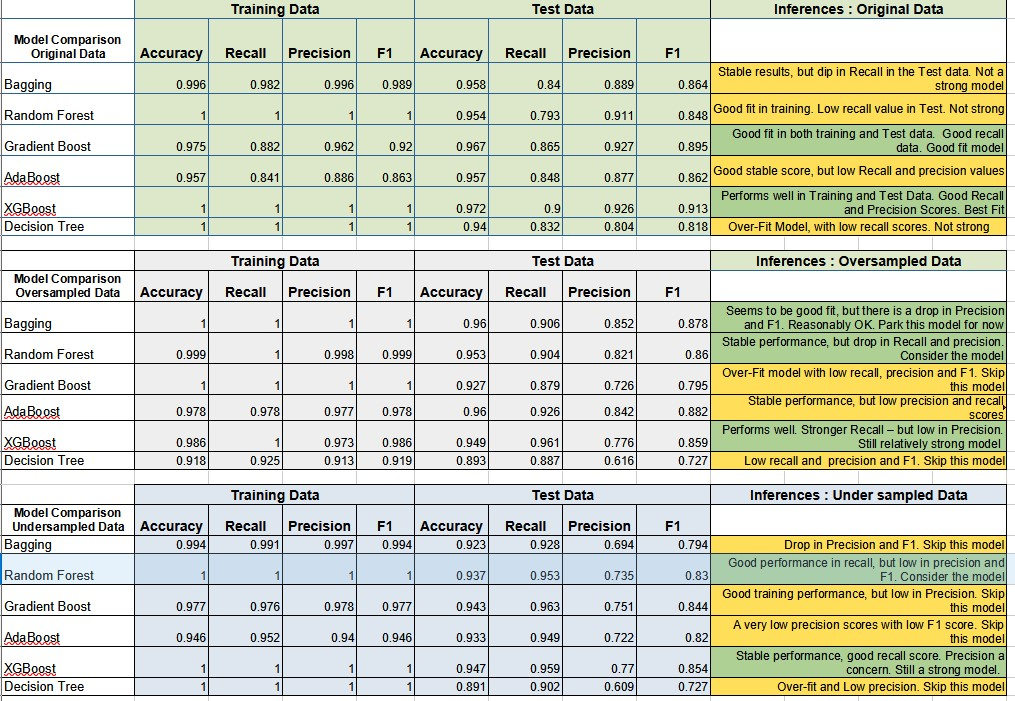

##Rationale for Model Selection during the comparison

 - Thera bank is looking for a good classification model, by which they can predict customer churn and thus reduce attrition. We also need to study reasons for attrition, allowing Thera bank to improve services in those areas thus effectively stemming the churn
 - For this, it is important that we focus on Precision and Recall. Precision helps us to identify if a customer is at attrition risk, while Recall ensures that we dont miss out even a single customer who could attrite. Even if we call out potential a non-churning customer as a Risk.
 - Given the problem statement of Thera bank, we would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
 - We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.
 - We would not focus much on Accuracy in this project while,  F1 we use it as a balance indicator.


## Model Comparison and Model Selection

 - XGBoost is the most consistently strong performer across all data splits (Original, Oversampled, and Undersampled). It strikes the best balance between all key metrics and has low overfitting. Given that our objective is to avoid customer churn, the high recall and balanced precision make it a strong candidate.

- Gradient Boosting (GBM) is a reasonable alternative. It also maintains competitive performance.

- Random Forest shows solid performance in most cases but suffers from overfitting, especially in the original data split. If you choose to go with this, it would benefit from hyperparameter tuning or regularization to improve generalization.

- Bagging and AdaBoost models, though solid, slightly underperform in comparison to XGBoost and GBM, especially in terms of recall and precision, making them less ideal for churn prediction where recall is crucial.


**XGBoost would be the best choice, given the current scenario**

#HyperTune the selected model - XGBoost further


 XGBoost tends to perform well with a larger number of estimators.
 - Let us finetune the range
 - Let us change the pos weights a little
 - Not sure on the learning rates, so I will leave it untouched
 - Change in gamma, probably essential, considering the regularization


In [57]:
############################START:Boosting:XG Boost: OVERSAMPLED#################
# Choose the type of classifier.
XGBoost_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

#The hyper tuning parameters are now being adjusted to get a better performance
param_grid = {
    'n_estimators': np.arange(50, 200, 50),
    'scale_pos_weight': [1, 5, 10, 15],
    'learning_rate': [0.001, 0.01, 0.05],
    'gamma': [0, 1, 3],
    'subsample': [0.5, 0.7, 0.9]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = RandomizedSearchCV(estimator=XGBoost_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)
#Fitting parameters in RandomizedSearchCV
grid_obj = grid_obj.fit(X_train_oversampled, y_train_oversampled)

# Set the clf to the best combination of parameters
XGBoost_tuned = grid_obj.best_estimator_

Training performance:
    Accuracy  Recall  Precision    F1
0     0.951   1.000      0.765 0.867
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.921   0.980      0.676 0.800


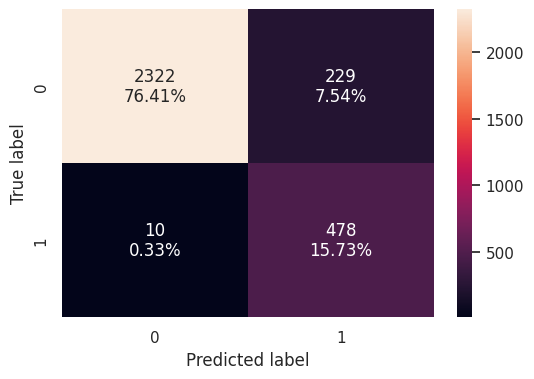

In [58]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(XGBoost_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(XGBoost_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(XGBoost_tuned,X_test,y_test)

#Chosen Model: XGBoost:

- The hyper tuning has paid off and following is the final parameter comparison of the fine-tuned XGBoost
- Let us suggest XGBoost as the model for Thera Bank to precisly identify the Customer Churn.

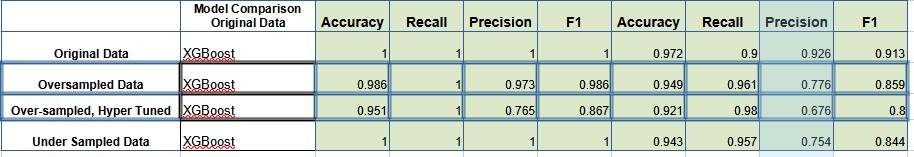

# Business Insights and Conclusions

- Customers with Card Category - Silver and Gold have high correlation with Total transaction counts and also have close correlation with Attrition. While these two categories are highest volumes, it is also evident that largest attrition comes from this category.
- Advice is to have some more scrutiny for the Gold and Silver category and apply the XBBoos ML model suggested here to watch this category of customers for churn.
- The inactivity of the customer between 2 - 3 months is the first indicator for the Thera bank to put them under watch list, irrespective of their income status, credit history, or the card category they fall into.
- If the customer is inactive for 12 months, the Attrition rate is higher. So, advice is to make few offers to these customers, so that they can be retained. Run the XGBoost ML Model here to predict the results of customers falling under this category.
- The attrition rate for the Platinum card category users with spend limited to ~5000 USD, is a sureshot sign of Attrition. There is a need to incentivise customers of Platinum card with these lower spend amounts.
- An important aspect from the EDA being - Platinum cards are being distributed to the income category less than 40k, and we do see attrition there. Recommendation is to downgrade these platinum card customers to Gold or Silver card and retain the customers
- Bank needs to focus on Gold card category as it seems to be selling the least. Incentivise schemes with Gold Card and shift 'stable' Silver-Card customers to Gold Card category
- The credit limit has a surprising negative correlation with the Avg Utilization Ratio at -.73. Thera bank might need to inspect and revise its policy of credit limit.

***